## ME40: Dimensional & Data Analyses in Engineering
### HW 2 - Friday, October 17th, 2025
#### Marissa Till

### Problem 2 - Matlab
#### (this was done in Python)

In [1]:
# === Import Required Packages ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# === Load Data ===
filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 2/HW2.csv'

df = pd.read_csv(filepath)  # Read the datafile and load into a dataframe

loads = df.columns[0]       # Retrieve the first column of the dataframe's title
diameters = df.columns[1]   # Retrieve the second column of the dataframe's title

print(loads)      # Shows Load P in [10^6 dynes]
print(diameters)  # Shows Diameter D in [cm]
# Can leave in these units as the dimensional analysis only relies on F and L

# P[10^6 dynes]
 D [cm]


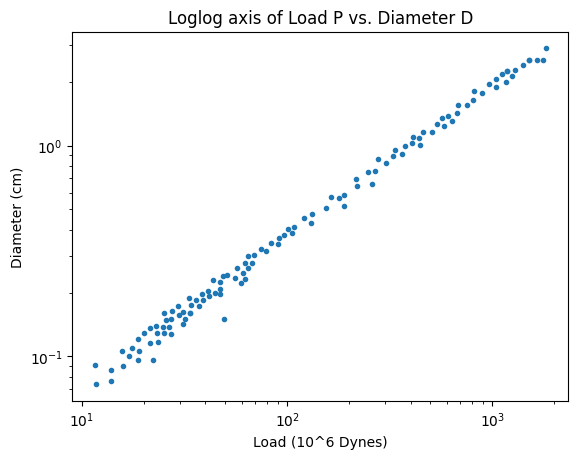

In [3]:
# === Plot diameter D verses load P using a loglog scale ===

plt.figure()
plt.loglog(df[loads], df[diameters], 'o', markersize=3)
plt.title('Loglog axis of Load P vs. Diameter D')
plt.xlabel('Load (10^6 Dynes)')
plt.ylabel('Diameter (cm)')
plt.show()

In [4]:
# === Power law regression ===
# Find the coefficients a and b in a fit form D ≈ aPᵇ (power law fit)
# See work on paper pdf for HW2

# Take natural logs
lnP = np.log(df[loads])
lnD = np.log(df[diameters])

# Linear regression: ln(D) = ln(a) + b * ln(P) with ln(a) as the intercept, and b as the slope
# Use linregress to calculate a linear least-squares regression for two sets of measurements
# Returns the slope, y-intercept, and other statistical values for hte fitted line
slope, intercept, _, _, _ = linregress(lnP, lnD)

b = slope
a = np.exp(intercept)  # solve for intercept = ln(a) → e^intercept

print(f"a = {a}")  # round to 3 decimals
print(f"b = {b:.3f}")  # round to 3 decimals

a = 0.013477418982149183
b = 0.719


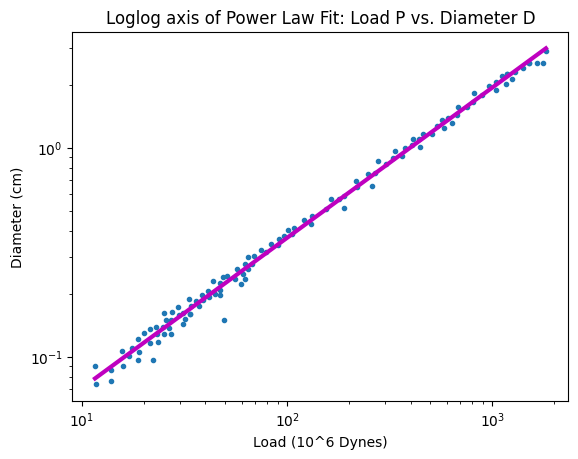

In [5]:
# === Plot fitted line ===

# Create 200 evenly spaced values between min and max P load values
p_fit = np.linspace(min(df[loads]), max(df[loads]), 200)
d_fit = a * (p_fit ** b)  # D ≈ aPᵇ

plt.figure()
plt.loglog(df[loads], df[diameters], 'o', markersize=3)
plt.loglog(p_fit, d_fit, color='m', linewidth=3)
plt.title('Loglog axis of Power Law Fit: Load P vs. Diameter D')
plt.xlabel('Load (10^6 Dynes)')
plt.ylabel('Diameter (cm)')
plt.show()

#### 4. Compare your numerical values in Q3 to the theory in Q1.
The numerical values in Q3 are a = 0.013477 and b = 0.719. The theory in Q1 is that D ~ P^(2/3). We see that the theory and numerical values both show/agree to a similar relationship between P & D (as 2/3 ~ 0.719) where D ~ P^(2/3). Also see work on paper pdf for HW2.